
#Graph methods for imaging, Vision and computing (B31RX) 2025

##Tutorial 7: Bayesian smoothing with Gaussian densities: the Rauch-Tung-Striebel (RTS) smoother

In this tutorial, we will apply the sum-product algorithm to extend the Kalman filter from the THA and implement a Bayesian smoother for estimating a multivariate Gaussian state. Following the reasoning of tutorial 6, we will first derive the smoothing equations using the Bayes' rule (and variable elimination) and then investigate how the sum-product rules can be used to directly compute the marginal distributions of interest.


### Background

#### Bayesian model:

We consider a multivariate state denoted $ \mathbf{p}_t \in \mathbb{R}^4 $. This state can vary over time with $ t \in \{1, \dots, T\} $.

The variations of $ \mathbf{p} $ over time are modelled a priori by a homogeneous order-1 Markov chain with transition kernel:

$$
f(\mathbf{p}_t \mid \mathbf{p}_{t-1}) = \mathcal{N}(\mathbf{p}_t ; \mathbf{Q} \mathbf{p}_{t-1}, \mathbf{R}),
$$

where $ \mathbf{Q} $ and $ \mathbf{R} $ have been defined in the THA.

The state $ \mathbf{p} $ is not observed directly. Instead, it is partially observed via the observations $ \mathbf{y}_t \in \mathbb{R}^2 $, such that:

$$
\mathbf{y}_t = \mathbf{B} \mathbf{p}_t + \mathbf{w}_t,
$$

where $ \mathbf{B} $ is also defined in the THA and $ \mathbf{w}_t \sim \mathcal{N}(\mathbf{w}_t; \mathbf{0}, \sigma_n^2 \mathbf{I}_2) $.

In the THA, we investigated a sequential, online filtering method to compute

$$
f(\mathbf{p}_t \mid \mathbf{Y}_t),
$$

with $ \mathbf{Y}_t = \{ \mathbf{y}_1, \dots, \mathbf{y}_t \} $, i.e., the posterior distribution of $ \mathbf{p}_t $ conditioned on all the observations previously observed (i.e., not the future observations).  
Here we will compute the marginal distributions

$$
f(\mathbf{p}_t \mid \mathbf{Y}_T), \quad \forall t
$$

which can be computed once the whole sequence of observations has been
observed. The Bayesian filter associated with the Kalman filter is called the Rauch-Tung-Striebel (RTS) smoother.

We will first show that the marginal distributions above can be computed analytically using a brute force approach by first computing the joint posterior distribution

$$
f(\mathbf{p}_1, \dots, \mathbf{p}_T \mid \mathbf{Y}_T),
$$

and marginalising all but one state.

### Question 1

Does the joint prior distribution $ f(\mathbf{p}_1, \dots, \mathbf{p}_T) $ belong to a known family of parametric distributions?  
If so, explain which family and why.

$$
\color{blue}{f(\mathbf{p}_1, \dots, \mathbf{p}_T) = f(\mathbf{p}_1) \prod_{t=2}^T f(\mathbf{p}_t \mid \mathbf{p}_{t-1})}
$$

$\color{blue}{\text{Introducing the stacked vector:}}$

$$
\color{blue}{
\mathbf{P} =
\begin{bmatrix}
\mathbf{p}_1 \\
\mathbf{p}_2 \\
\vdots \\
\mathbf{p}_T
\end{bmatrix},
}
$$

$\color{blue}{\text{we can show that:}}$

$$
\color{blue}{
f(\mathbf{P}) \propto \exp\left( -\frac{1}{2} (\mathbf{P} - \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (\mathbf{P} - \boldsymbol{\mu}) \right)
}
$$

$\color{blue}{\text{Hence, $ f(\mathbf{P}) $ is a multivariate Gaussian density.}}$

### Question 2

Using Bayes' rule, show that $ f(\mathbf{p}_1, \dots, \mathbf{p}_T \mid \mathbf{Y}_T) $ belongs to a known family of parametric distributions.

$\color{blue}{\text{Similarly, the likelihood of the full observation vector $ \mathbf{Y}_T $ given the state trajectory $ \mathbf{P} $ takes the form:}}$

$$
\color{blue}{
f(\mathbf{Y}_T \mid \mathbf{P}) \propto \exp\left( -\frac{1}{2\sigma^2} (\mathbf{Y}_T - \mathbf{E} \mathbf{P})^\top (\mathbf{Y}_T - \mathbf{E} \mathbf{P}) \right)
}
$$

$\color{blue}{\text{with}}$

$$
\color{blue}{
\mathbf{E} =
\begin{bmatrix}
\mathbf{B} & \mathbf{0} & \cdots & \mathbf{0} \\
\mathbf{0} & \mathbf{B} & \cdots & \mathbf{0} \\
\vdots & \vdots & \ddots & \vdots \\
\mathbf{0} & \mathbf{0} & \cdots & \mathbf{B}
\end{bmatrix}
}
$$

$\color{blue}{\text{This is again a Gaussian in $\mathbf{P}$.}}$

$\color{blue}{\text{From Bayes' rule:}}$

$$
\color{blue}{
f(\mathbf{P} \mid \mathbf{Y}_T) \propto f(\mathbf{P}) f(\mathbf{Y}_T \mid \mathbf{P})
}
$$

$\color{blue}{\text{Since both terms on the right-hand side are Gaussian in $ \mathbf{P} $, their product is also Gaussian.}}$

$\color{blue}{f(\mathbf{P} \mid \mathbf{Y}_T) \text{ is Gaussian}}$

### Question 3

Using the previous results, which family does $ f(\mathbf{p}_t \mid \mathbf{Y}_T) $ belong to?  
How can one compute its moments (e.g., mean and covariance)?

This computation starting from $ f(\mathbf{p}_1, \dots, \mathbf{p}_T \mid \mathbf{Y}_T) $ can be extremely expensive, especially for long sequences due to large matrix inversion required when marginalising variables. However, we can compute the marginals more efficiently using the **sum-product algorithm**.

$\color{blue}{\text{Since marginals of multivariate Gaussians are also Gaussian, we have:}}$

$$
\color{blue}{
f(\mathbf{p}_t \mid \mathbf{Y}_T) \text{ is Gaussian}
}
$$

$\color{blue}{\text{Marginal moments:}}$

$\color{blue}{\text{- The mean of $ \mathbf{p}_t $ can be extracted from the joint mean vector of $ \mathbf{P} $.}}$
$\color{blue}{\text{- The covariance of $ \mathbf{p}_t $ corresponds to the diagonal block $ (4 \times 4) $ of the full covariance matrix of $ \mathbf{P} $.}}$

### Question 4

Draw the factor graph (FG) associated with the Bayesian model:

$$
f(\mathbf{p}_1, \dots, \mathbf{p}_T, \mathbf{y}_1, \dots, \mathbf{y}_T).
$$

Cloning into 'B31XR'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 225 (delta 22), reused 3 (delta 3), pack-reused 191 (from 1)
Receiving objects: 100% (225/225), 9.59 MiB | 11.98 MiB/s, done.
Resolving deltas: 100% (109/109), done.
/content/B31XR/Tutorial 7


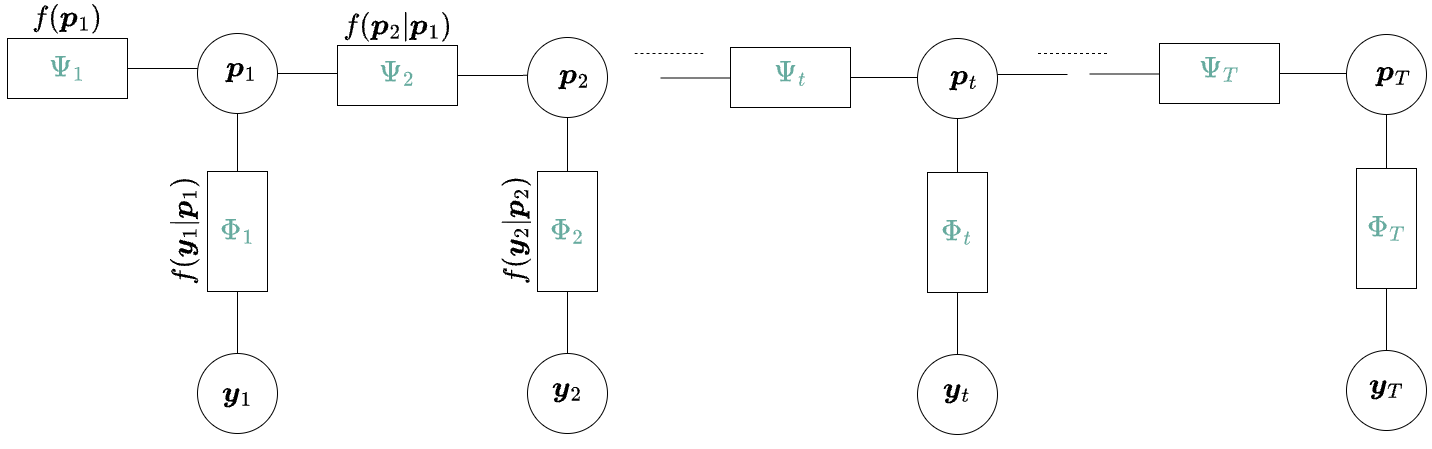

In [1]:
!git clone https://github.com/BISC-Group-HWU/B31XR.git
%cd B31XR/Tutorial\ 7

from IPython.display import Image, display

display(Image(filename='T7-Q4.png'))

### Question 5

Is this graph a tree?

$\color{blue}{\text{Yes}}$

### Question 6

Compute the messages from each leaf variable to their neighbours (factor nodes).


$$
\color{blue}{\mu_{y_t \to \Phi_t}(y_t) = 1.} \quad \color{blue}{\text{(see lecture }notes)}
$$

### Question 7

Starting from $ \mathbf{p}_1 $, compute the messages propagating from $ t = 1 $ to $ t = T $.

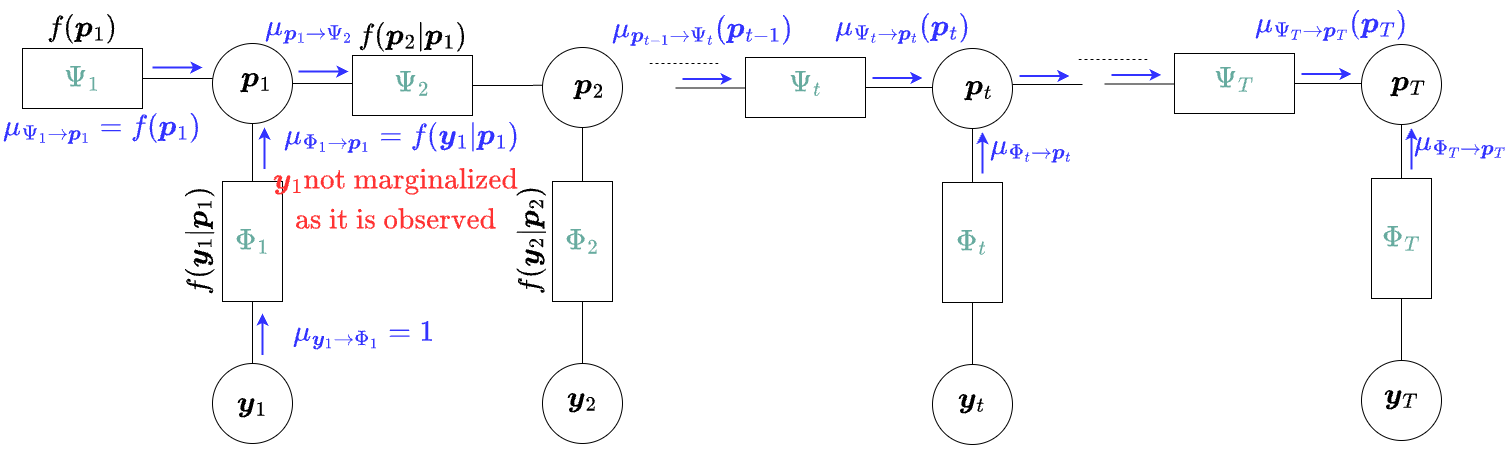

In [ ]:
display(Image(filename='T7-Q7.png'))

$$
\color{blue}{
\mu_{\mathbf{p}_1 \to \Psi_2} = \mu_{\Phi_{1} \to \mathbf{p}_1} \times \mu_{\Psi_{1} \to \mathbf{p}_1} \quad \text{("posterior")}
}
$$

$$
\color{blue}{
\mu_{\Psi_t \to \mathbf{p}_t}(\mathbf{p}_t) = \int \Psi_t(\mathbf{p}_{t-1}, \mathbf{p}_t) \, \mu_{\mathbf{p}_{t-1} \to \Psi_t}(\mathbf{p}_{t-1}) \, d\mathbf{p}_{t-1}
\quad \text{("predictive distribution")}
}
$$

### Question 8

Starting from $ \mathbf{p}_T $, compute the messages propagating from $ t = T $ to $ t = 1 $.

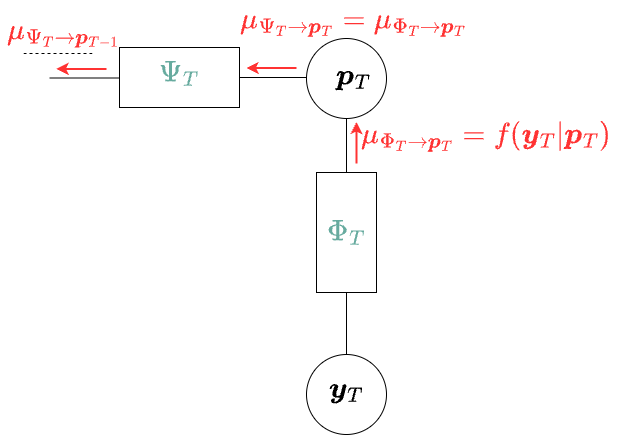

In [ ]:
display(Image(filename='T7-Q8.png'))

$$
\color{blue}{
\mu_{\Psi_T \to \mathbf{p}_{T-1}} = \int \Psi_T(\mathbf{p}_T, \mathbf{p}_{T-1}) \, \mu_{\mathbf{p}_T \to \Psi_T} \, d\mathbf{p}_T
\quad \text{(similar to predictive step)}
}
$$

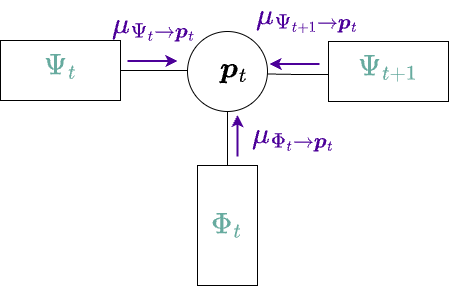

In [ ]:
display(Image(filename='T7-Q8-2.png'))

$\color{blue}{\text{Marginal distribution:}}$


$$
\color{blue}{
f(\mathbf{p}_t \mid \mathbf{Y}_T) \propto
\mu_{\Psi_t \to \mathbf{p}_t} \,
\mu_{\Psi_{t+1} \to \mathbf{p}_t} \,
\mu_{\Phi_t \to \mathbf{p}_t}
}
$$

### Question 9

Implement the sum-product algorithm for this Bayesian model and, using the data of the **THA** (with and without missing data), compare the estimation results of the **Bayesian filter (THA)** and the **Bayesian smoother**.

What do you remark in the case of missing data?

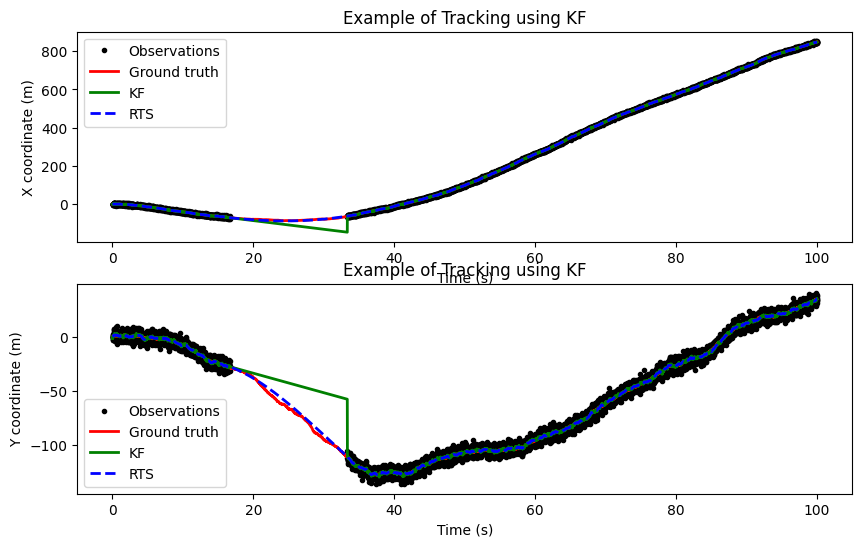

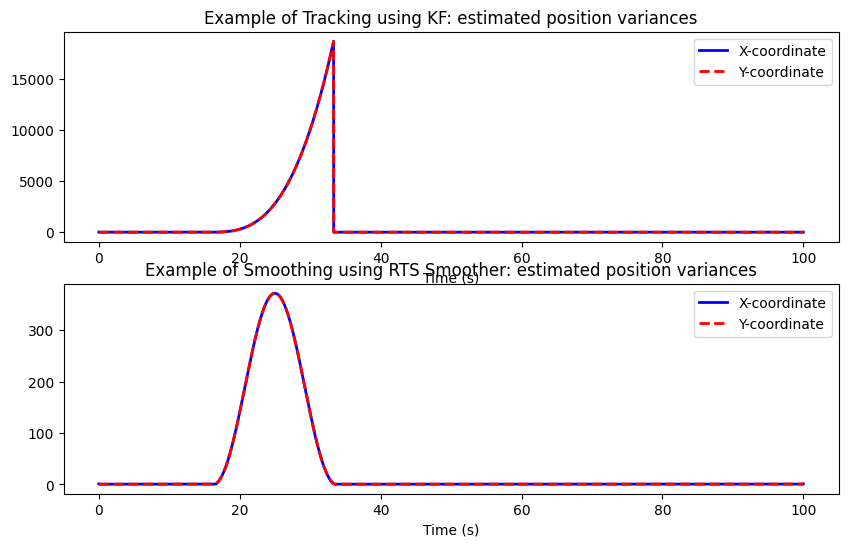

In [5]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Load data from .mat file
data = sio.loadmat('data2.mat')
time = data['time'].flatten()
y = data['y']
y0 = data['y0']
Delta_t = data['Delta_t'][0][0]

T = len(time)
sigma2_noise = 1e1

# Initialize arrays
M_t_tminus1 = np.zeros((4, T))
Sigma_t_tminus1 = np.zeros((4, 4, T))
M_t_t = np.zeros((4, T))
Sigma_t_t = np.zeros((4, 4, T))

Q = np.array([[1, 0, Delta_t, 0],
              [0, 1, 0, Delta_t],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

B = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])

R = np.diag([0.1, 0.1, 0.1, 0.1])

M_0_0 = np.array([0, 0, 0, 0])
Sigma_0_0 = 1e2 * np.eye(4)

M_t_tminus1[:, 0] = Q @ M_0_0
Sigma_t_tminus1[:, :, 0] = Q @ Sigma_0_0 @ Q.T + R

# Kalman Filter
for t in range(T):
    if t > 0:
        M_t_tminus1[:, t] = Q @ M_t_t[:, t - 1]
        Sigma_t_tminus1[:, :, t] = Q @ Sigma_t_t[:, :, t - 1] @ Q.T + R

    if np.isnan(y[0, t]):
        M_t_t[:, t] = M_t_tminus1[:, t]
        Sigma_t_t[:, :, t] = Sigma_t_tminus1[:, :, t]
    else:
        y_tilde = y[:, t] - B @ M_t_tminus1[:, t]
        S = B @ Sigma_t_tminus1[:, :, t] @ B.T + sigma2_noise * np.eye(2)
        Kt = Sigma_t_tminus1[:, :, t] @ B.T @ np.linalg.inv(S)
        M_t_t[:, t] = M_t_tminus1[:, t] + Kt @ y_tilde
        Sigma_t_t[:, :, t] = (np.eye(4) - Kt @ B) @ Sigma_t_tminus1[:, :, t]

# RTS Smoother
M_t_t_smoothed = M_t_t.copy()
Sigma_t_t_smoothed = Sigma_t_t.copy()
M_tplus1_t = np.zeros_like(M_t_tminus1)
Sigma_tplus1_t = np.zeros_like(Sigma_t_tminus1)

for t in range(T - 2, -1, -1):
    M_tplus1_t[:, t + 1] = Q @ M_t_t[:, t]
    Sigma_tplus1_t[:, :, t + 1] = Q @ Sigma_t_t[:, :, t] @ Q.T + R
    Gt = Sigma_t_t[:, :, t] @ Q.T @ np.linalg.inv(Sigma_tplus1_t[:, :, t + 1])
    M_t_t_smoothed[:, t] = M_t_t[:, t] + Gt @ (M_t_t_smoothed[:, t + 1] - M_tplus1_t[:, t + 1])
    Sigma_t_t_smoothed[:, :, t] = Sigma_t_t[:, :, t] + Gt @ (Sigma_t_t_smoothed[:, :, t + 1] - Sigma_tplus1_t[:, :, t + 1]) @ Gt.T

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, y[0, :], 'k.', label='Observations')
plt.plot(time, y0[0, :], 'r', linewidth=2, label='Ground truth')
plt.plot(time, M_t_t[0, :], 'g', linewidth=2, label='KF')
plt.plot(time, M_t_t_smoothed[0, :], 'b--', linewidth=2, label='RTS')
plt.xlabel('Time (s)')
plt.ylabel('X coordinate (m)')
plt.title('Example of Tracking using KF')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, y[1, :], 'k.', label='Observations')
plt.plot(time, y0[1, :], 'r', linewidth=2, label='Ground truth')
plt.plot(time, M_t_t[1, :], 'g', linewidth=2, label='KF')
plt.plot(time, M_t_t_smoothed[1, :], 'b--', linewidth=2, label='RTS')
plt.xlabel('Time (s)')
plt.ylabel('Y coordinate (m)')
plt.title('Example of Tracking using KF')
plt.legend()

plt.savefig('example_results_data2.png', dpi=512)
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, np.squeeze(Sigma_t_t[0, 0, :]), 'b', linewidth=2, label='X-coordinate')
plt.plot(time, np.squeeze(Sigma_t_t[1, 1, :]), 'r--', linewidth=2, label='Y-coordinate')
plt.xlabel('Time (s)')
plt.title('Example of Tracking using KF: estimated position variances')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, np.squeeze(Sigma_t_t_smoothed[0, 0, :]), 'b', linewidth=2, label='X-coordinate')
plt.plot(time, np.squeeze(Sigma_t_t_smoothed[1, 1, :]), 'r--', linewidth=2, label='Y-coordinate')
plt.xlabel('Time (s)')
plt.title('Example of Smoothing using RTS Smoother: estimated position variances')
plt.legend()

# plt.savefig('example_results_data2_variances.png', dpi=512)
plt.show()
